In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [5]:
tc = pd.read_csv("ToyotaCorolla.csv",encoding= 'unicode_escape')

In [6]:
tc.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [7]:
tc.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [8]:
TC = tc.drop(['Id', 'Model', 'Mfg_Month', 'Mfg_Year',
       'Fuel_Type', 'Met_Color', 'Color', 'Automatic',
       'Cylinders', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'], axis=1)

In [9]:
TC.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [10]:
TC = TC.rename(columns = {'Age_08_04':'Age', 'Quarterly_Tax':'QTax'})

In [11]:
TC.head(5)

Price  Age     KM  HP    cc  Doors  Gears  QTax  Weight
0  13500   23  46986  90  2000      3      5   210    1165
1  13750   23  72937  90  2000      3      5   210    1165
2  13950   24  41711  90  2000      3      5   210    1165
3  14950   26  48000  90  2000      3      5   210    1165
4  13750   30  38500  90  2000      3      5   210    1170

In [12]:
TC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QTax    1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [13]:
TC.describe()

Price          Age             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears         QTax      Weight  
count  1436.000000  1436.000000  1436.000000  1436.00000  
mean      4.033426     5.026462    87.122563  1072.45961  
std       0.952677     0.188510    41.128611    52.64112  
min       2.000000     3.000000    19.000000  1000.00000  
25%       3.000000     5.000000    69.000000  1040.00000  
50%       4.000000     5.000000    85.000000  1070.00000  
75%       5.000000     5.000000    85.000000  1085.00000  
max       5.000000     6.000000   283.000000  1615.00000

In [17]:
TC[TC.duplicated()].shape

(1, 9)

In [18]:
TC[TC.duplicated()]

Price  Age     KM   HP    cc  Doors  Gears  QTax  Weight
113  24950    8  13253  116  2000      5      5   234    1320

In [19]:
tc1 =TC.drop([113],axis=0)

In [20]:
tc1 = tc1.reset_index()

In [21]:
tc1 = tc1.drop(['index'],axis =1)

In [22]:
tc1.corr()

Price       Age        KM        HP        cc     Doors     Gears  \
Price   1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604  0.063831   
Age    -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929 -0.005629   
KM     -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193  0.014890   
HP      0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803  0.209642   
cc      0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254  0.014732   
Doors   0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000 -0.160101   
Gears   0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101  1.000000   
QTax    0.211508 -0.193319  0.283312 -0.302287  0.305982  0.107353 -0.005125   
Weight  0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734  0.021238   

            QTax    Weight  
Price   0.211508  0.575869  
Age    -0.193319 -0.466484  
KM      0.283312 -0.023969  
HP     -0.302287  0.087143  
cc      0.305982  0.335077  
Doors   0.107353  0.301734  
Gears  -0.005125  0.021238  
QTax    1.000000  0.621988  
Weight  0.621988  1.000000

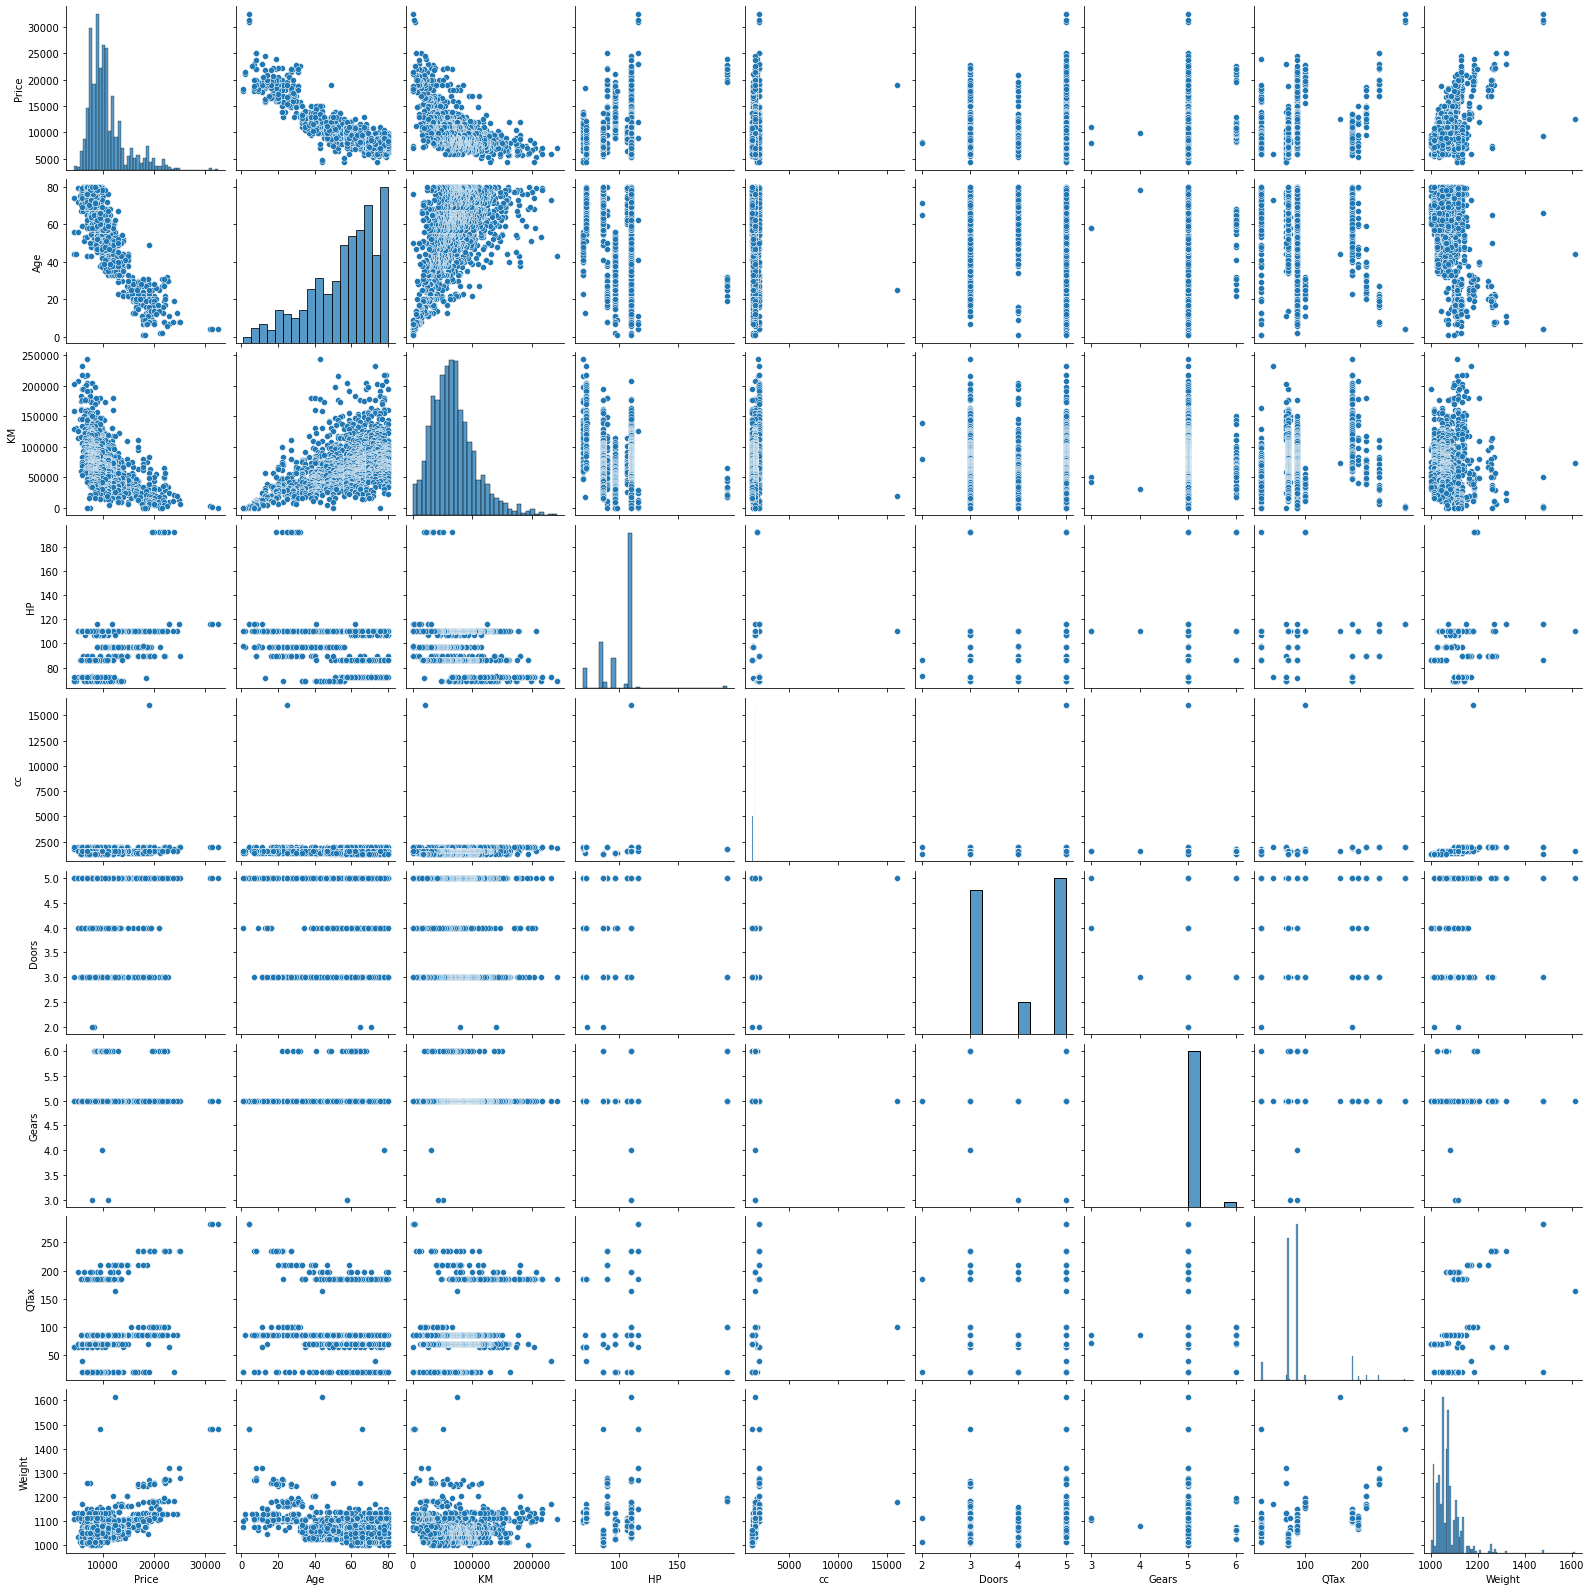

In [23]:
sns.pairplot (data=tc1)

# Building the regression model

In [24]:
model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc1).fit()

In [25]:
model1.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QTax            3.858805
Weight         16.855470
dtype: float64

In [26]:
print(model1.tvalues, '\n', model1.pvalues)

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
cc           -1.316436
Doors        -0.023012
Gears         3.034563
QTax          2.944198
Weight       15.760663
dtype: float64 
 Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
cc            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QTax          3.290363e-03
Weight        1.031118e-51
dtype: float64


In [27]:
(model1.rsquared,model1.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

# Calculating VIF to check colinearity factor

In [28]:
rsq_Age = smf.ols('Age~KM+HP+cc+Doors+Gears+QTax+Weight',data=tc1).fit().rsquared  
vif_Age = 1/(1-rsq_Age) 

rsq_KM = smf.ols('KM~Age+HP+cc+Doors+Gears+QTax+Weight',data=tc1).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_HP = smf.ols('HP~Age+KM+cc+Doors+Gears+QTax+Weight',data=tc1).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 

rsq_cc = smf.ols('cc~Age+KM+HP+Doors+Gears+QTax+Weight',data=tc1).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_Doors = smf.ols('Doors~Age+KM+HP+cc+Gears+QTax+Weight',data=tc1).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) 

rsq_Gears = smf.ols('Gears~Age+KM+HP+cc+Doors+QTax+Weight',data=tc1).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) 

rsq_QTax = smf.ols('QTax~Age+KM+HP+cc+Doors+Gears+Weight',data=tc1).fit().rsquared  
vif_QTax = 1/(1-rsq_QTax) 

rsq_Weight = smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QTax',data=tc1).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) 


d1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','QTax','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QTax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

Variables       VIF
0       Age  1.876236
1        KM  1.757178
2        HP  1.419180
3        cc  1.163470
4     Doors  1.155890
5     Gears  1.098843
6      QTax  2.295375
7    Weight  2.487180

In [36]:
#no colinearilty, since all the VIF values are lesser than 20

# Q-Q plot for checking the normality of residuals

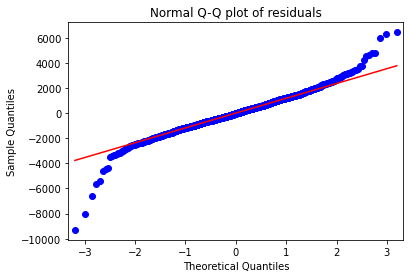

In [29]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [30]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()


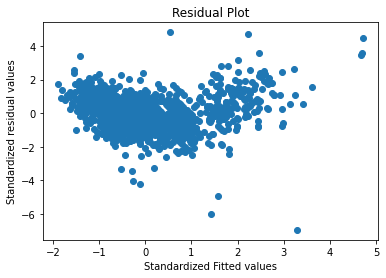

In [31]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

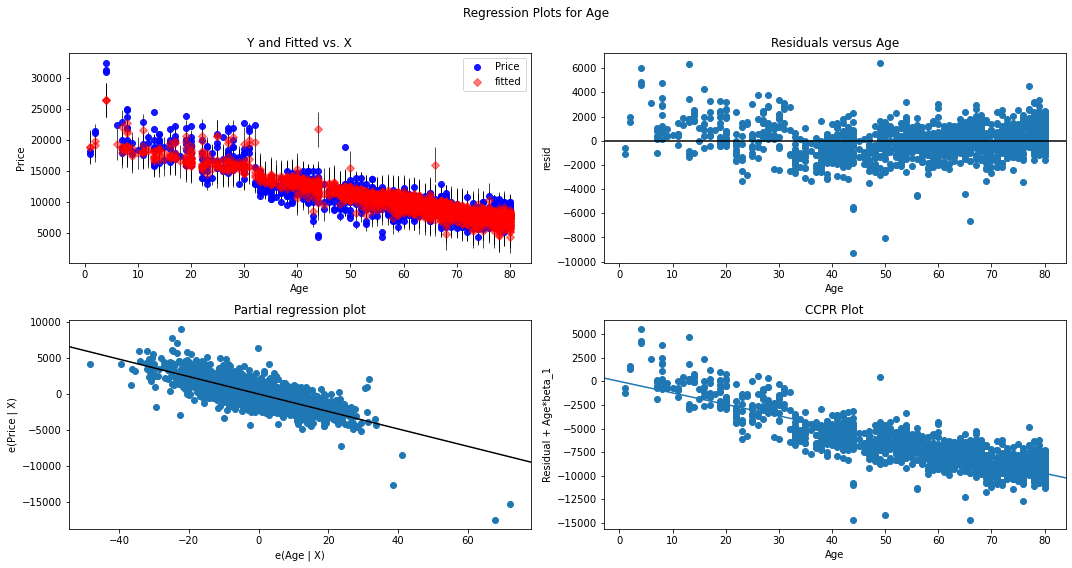

In [32]:
# Residual Vs Regressors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Age", fig=fig)
plt.show()

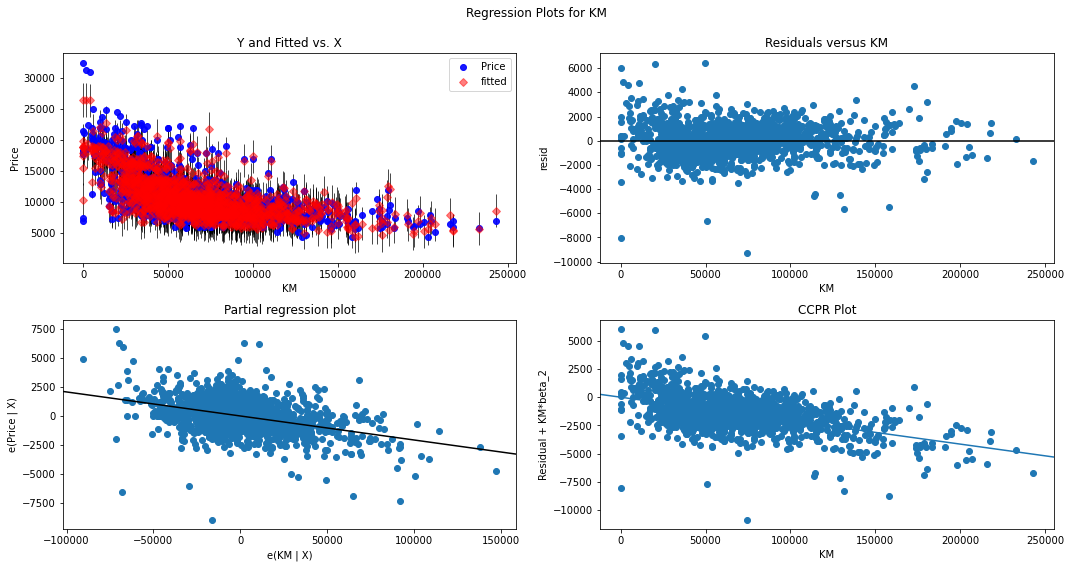

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "KM", fig=fig)
plt.show()

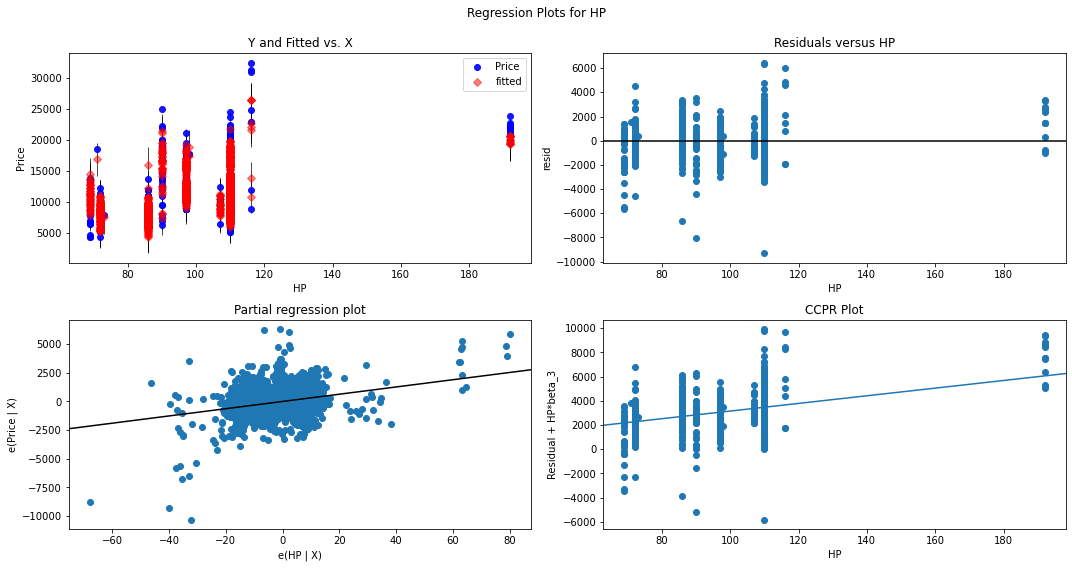

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "HP", fig=fig)
plt.show()

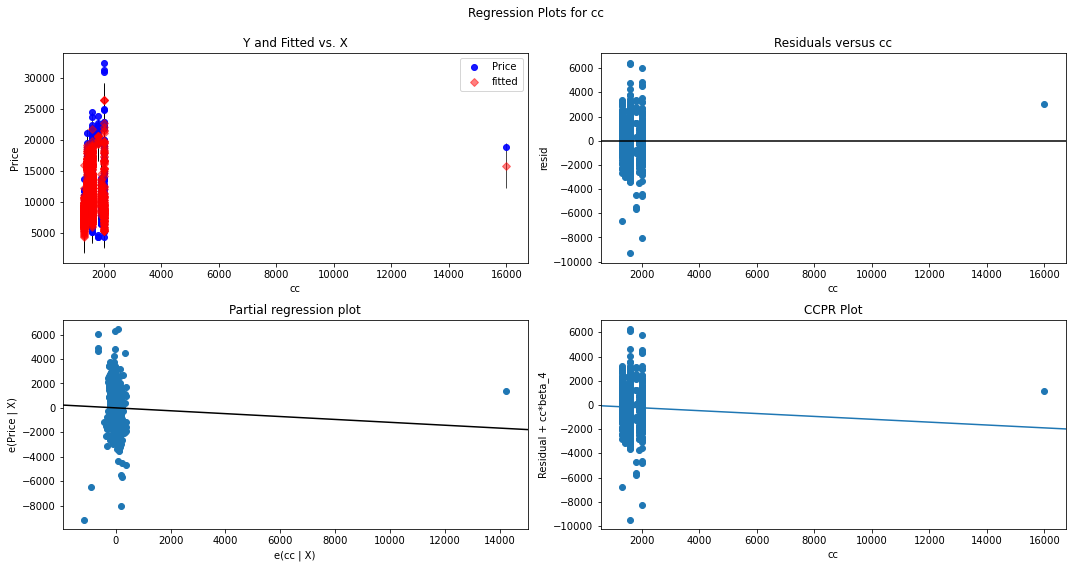

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "cc", fig=fig)
plt.show()

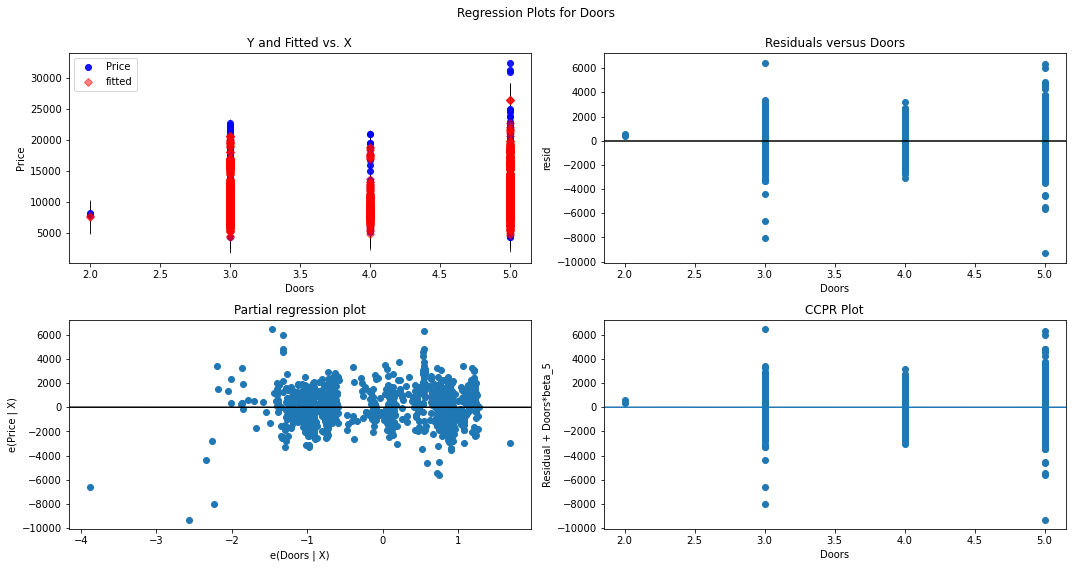

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Doors", fig=fig)
plt.show()

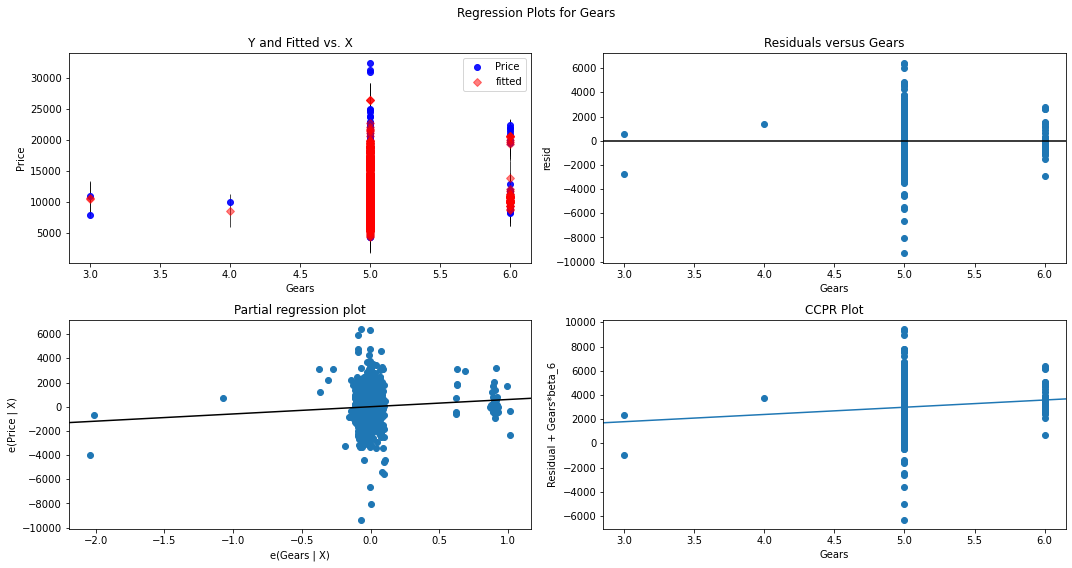

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Gears", fig=fig)
plt.show()

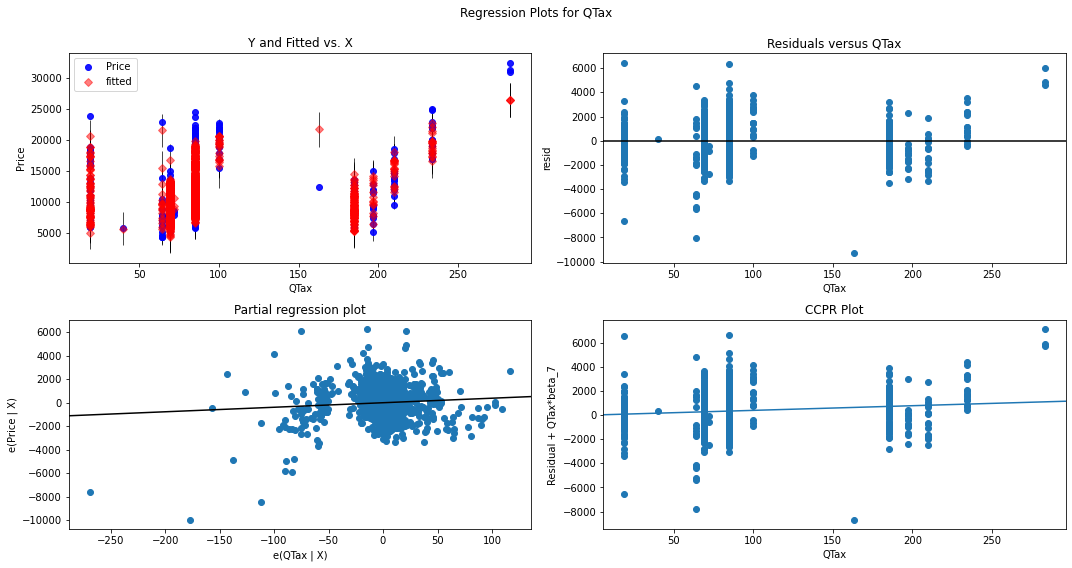

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "QTax", fig=fig)
plt.show()

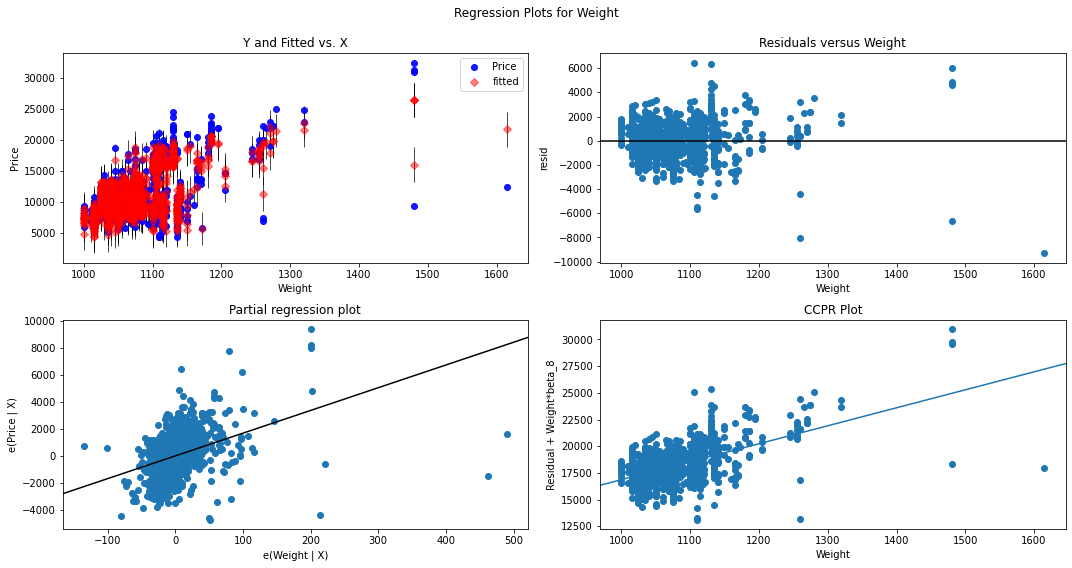

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Weight", fig=fig)
plt.show()

In [40]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

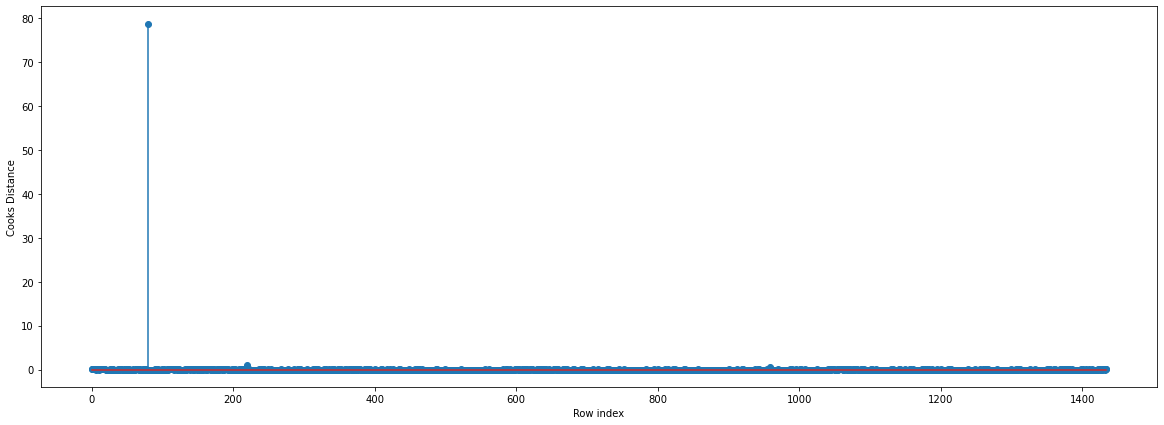

In [41]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
(np.argmax(c),np.max(c))

(80, 78.7295058224916)

In [43]:
tc2 = tc1.drop([80],axis=0).reset_index()

In [44]:
tc2 = tc2.drop(['index'],axis=1)

In [45]:
model2 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc2).fit()

In [46]:
(model2.rsquared,model2.rsquared_adj)

(0.8681163912634053, 0.867375992056463)

In [47]:
# model3
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance

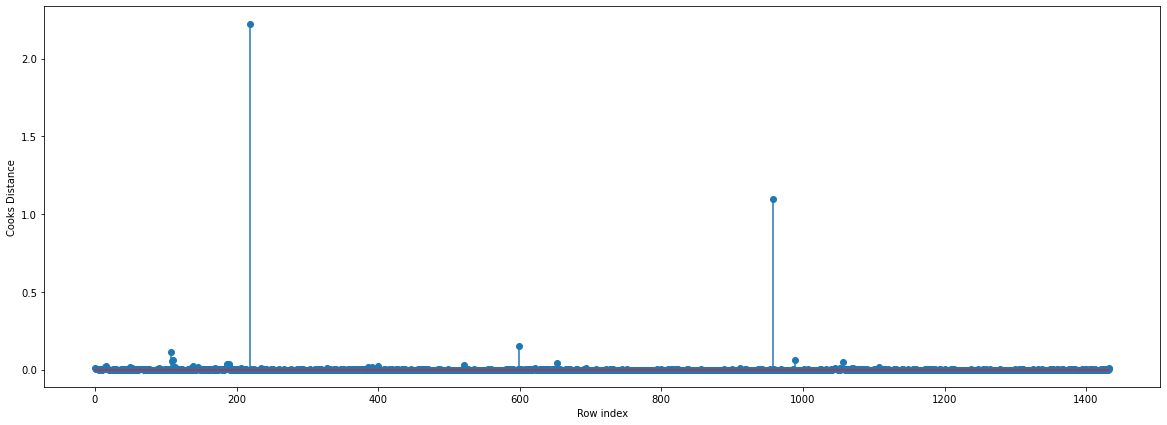

In [48]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [49]:
(np.argmax(c),np.max(c))

(219, 2.2253513655270813)

In [50]:
tc3 = tc2.drop([219],axis=0).reset_index()

In [51]:
tc3 = tc3.drop(['index'],axis=1)

In [52]:
model3 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc3).fit()

In [53]:
(model3.rsquared,model3.rsquared_adj)

(0.8765926307402282, 0.8758993309129262)

In [54]:
# model 4
model_influence = model3.get_influence() 
(c, _) = model_influence.cooks_distance

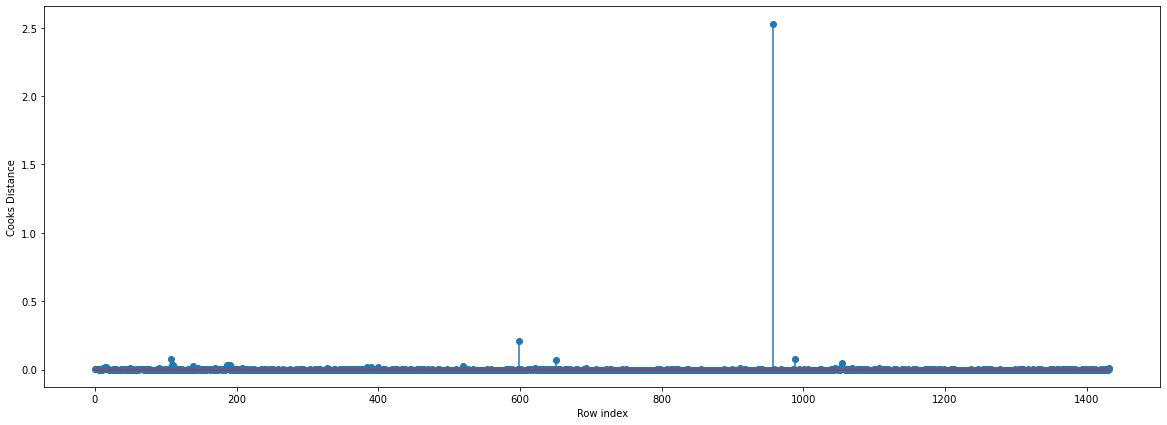

In [55]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [56]:
(np.argmax(c),np.max(c))

(957, 2.530779623276654)

In [57]:
tc4 = tc3.drop([957],axis=0).reset_index()

In [58]:
tc4 = tc4.drop(['index'],axis=1)

In [59]:
model4 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc4).fit()

In [60]:
(model4.rsquared,model4.rsquared_adj)

(0.8839684606741538, 0.8833161400033128)

In [61]:
# model 5
model_influence = model4.get_influence() 
(c, _) = model_influence.cooks_distance

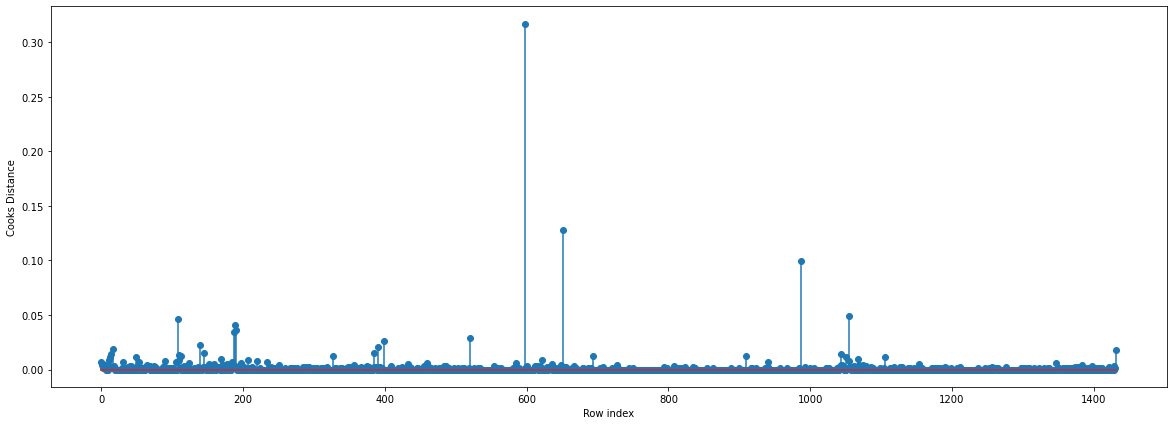

In [62]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [63]:
(np.argmax(c),np.max(c))

(598, 0.31689035401452564)

In [64]:
tc5 = tc4.drop([598],axis=0).reset_index()

In [65]:
tc5 = tc5.drop(['index'],axis=1)

In [66]:
model5 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc5).fit()

In [67]:
(model5.rsquared,model5.rsquared_adj)

(0.8882395145171204, 0.8876107635439396)

In [68]:
# model 6
model_influence = model5.get_influence() 
(c, _) = model_influence.cooks_distance

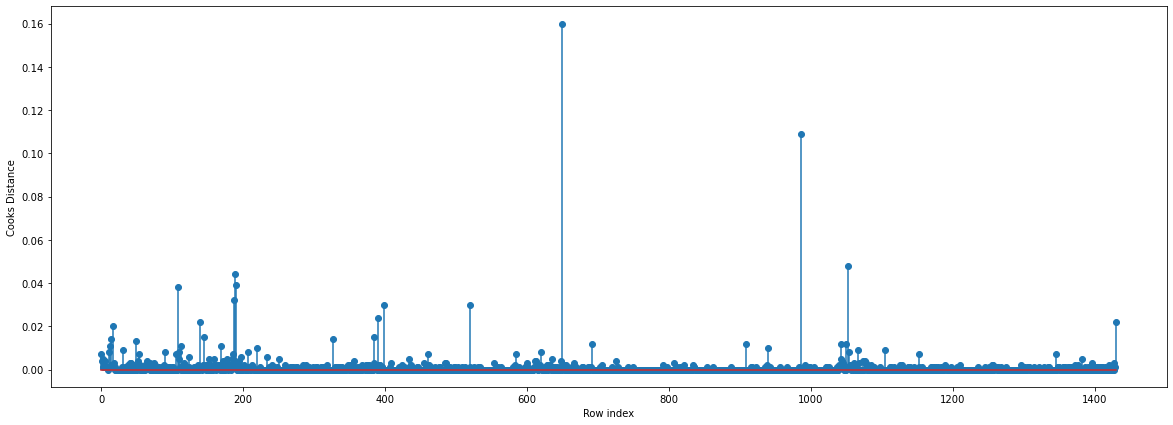

In [69]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc5)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [70]:
(np.argmax(c),np.max(c))

(650, 0.16028069686041221)

In [71]:
tc6 = tc5.drop([650],axis=0).reset_index()

In [72]:
tc6 = tc6.drop(['index'],axis=1)

In [73]:
model6 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc6).fit()

In [74]:
(model6.rsquared,model6.rsquared_adj)

(0.8902571486612915, 0.8896393141709962)

In [75]:
# model 7
model_influence = model6.get_influence() 
(c, _) = model_influence.cooks_distance

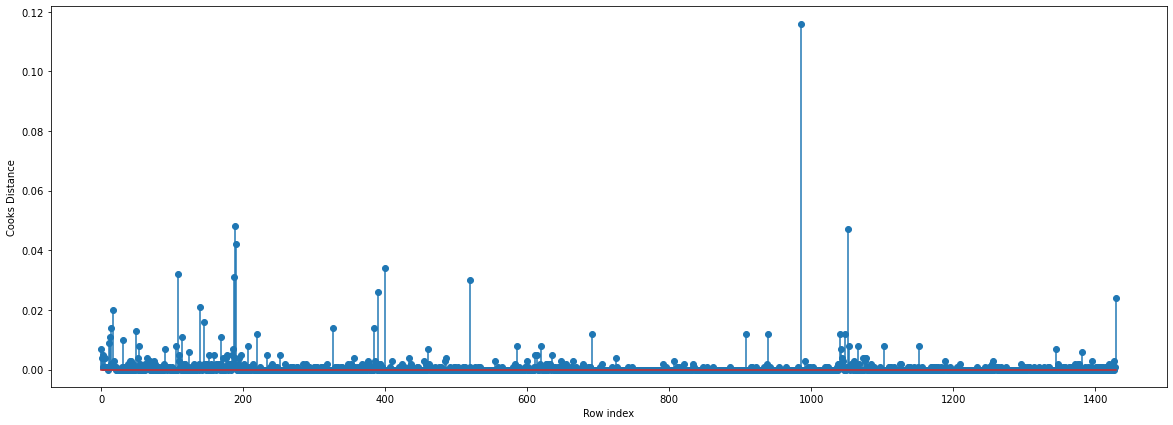

In [76]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc6)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [77]:
(np.argmax(c),np.max(c))

(985, 0.11627991877786244)

In [78]:
tc7 = tc6.drop([985],axis=0).reset_index(drop=True)
tc7

Price  Age     KM   HP    cc  Doors  Gears  QTax  Weight
0     13500   23  46986   90  2000      3      5   210    1165
1     13750   23  72937   90  2000      3      5   210    1165
2     13950   24  41711   90  2000      3      5   210    1165
3     14950   26  48000   90  2000      3      5   210    1165
4     13750   30  38500   90  2000      3      5   210    1170
...     ...  ...    ...  ...   ...    ...    ...   ...     ...
1424   7500   69  20544   86  1300      3      5    69    1025
1425  10845   72  19000   86  1300      3      5    69    1015
1426   8500   71  17016   86  1300      3      5    69    1015
1427   7250   70  16916   86  1300      3      5    69    1015
1428   6950   76      1  110  1600      5      5    19    1114

[1429 rows x 9 columns]

In [79]:
model7 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc7).fit()

In [80]:
(model7.rsquared,model7.rsquared_adj)

(0.8909888960319987, 0.8903747489673902)

In [81]:
# model 8
model_influence = model7.get_influence() 
(c, _) = model_influence.cooks_distance

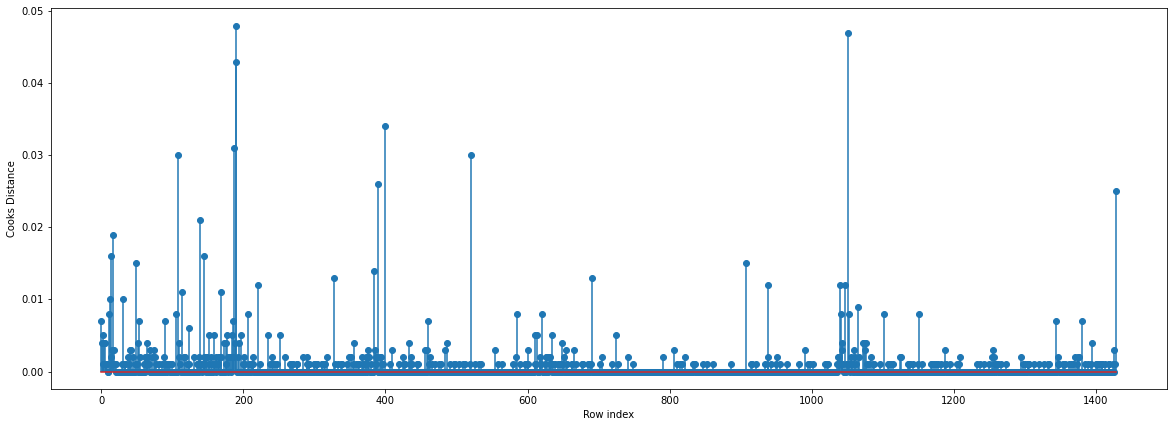

In [82]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc7)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [83]:
# Since all the values fall under 0.05 and many values fall within the same range, we will stop the outlier removal process here
# We can consider Model 7 as the final model and use the regression equation for future estimates.

In [84]:
# Checking the model by predicting the price of the same data set and comparing it with actual values

In [85]:
pred_price = pd.DataFrame (model7.predict(tc7), columns=['Predict_Price'])

In [86]:
pred_price.head()

Predict_Price
0   16341.105289
1   15885.384177
2   16324.561426
3   15995.766877
4   15894.217599

In [87]:
Actual_Price = tc7['Price']

In [88]:
pred_price1 = pd.concat([Actual_Price, pred_price], axis=1)

In [89]:
pred_price1.head()

Price  Predict_Price
0  13500   16341.105289
1  13750   15885.384177
2  13950   16324.561426
3  14950   15995.766877
4  13750   15894.217599

In [90]:
Error = pd.DataFrame (((pred_price1['Predict_Price']- pred_price1['Price'])/pred_price1['Price']), columns=['Error'])

In [91]:
result = pd.concat ([pred_price1, Error], axis=1)

In [92]:
result.head()

Price  Predict_Price     Error
0  13500   16341.105289  0.210452
1  13750   15885.384177  0.155301
2  13950   16324.561426  0.170219
3  14950   15995.766877  0.069951
4  13750   15894.217599  0.155943

In [93]:
result.style.format({'Price': "{:.2f}",'Predict_Price': "{:.2f}",'Error': "{:.2%}"})

In [94]:
result.Error.mean()

0.010996858085408682

In [ ]:
#Error is close to 0,regression equation is working well